<a href="https://colab.research.google.com/github/VvS-2403/Svd-Applications/blob/main/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of U: (142, 142)
Shape of Σ (vector): (142,)
Shape of Vᵀ: (142, 355)

First 10 singular values:
[96.63266945 14.61582384 12.31778153  8.25497723  7.3375852   6.7398393
  5.07693379  4.67857804  4.21441445  4.06880883]


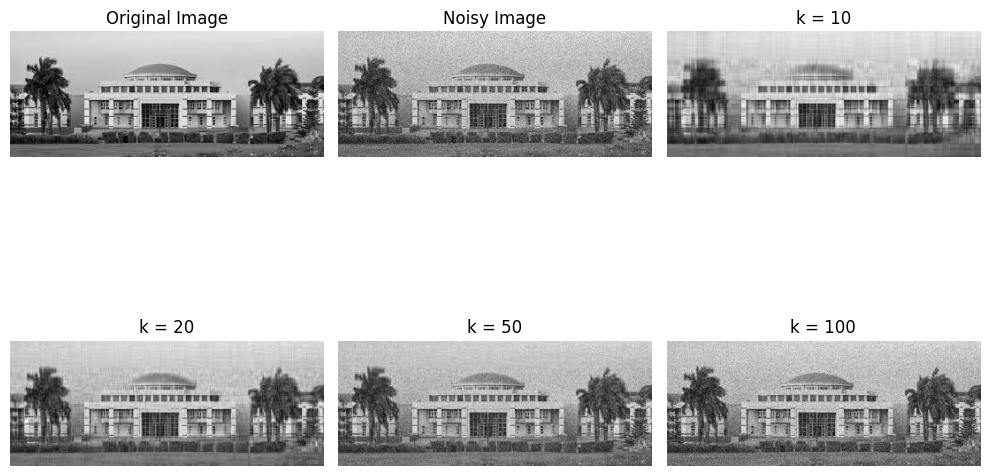

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io


# 1. Load and Prepare Image
img = io.imread("Untitled.jpg")      # Load your image
img_gray = color.rgb2gray(img)       # Convert to grayscale
img_gray = img_gray.astype(float)    # Ensure floating type


# 2. Add Gaussian Noise
noise = np.random.normal(0, 0.05, img_gray.shape)
img_noisy = img_gray + noise


# 3. Compute SVD
U, S, VT = np.linalg.svd(img_noisy, full_matrices=False)

print("Shape of U:", U.shape)
print("Shape of Σ (vector):", S.shape)
print("Shape of Vᵀ:", VT.shape)

# Show first 10 singular values
print("\nFirst 10 singular values:")
print(S[:10])


# 4. Low-Rank Reconstruction Function
def low_rank(k):
    """Return rank-k approximation of the noisy image."""
    S_k = np.zeros_like(S)
    S_k[:k] = S[:k]                 # keep top-k singular values
    return U @ np.diag(S_k) @ VT    # U * Σ_k * Vᵀ


# 5. Reconstruct Images at Different Ranks
rank10  = low_rank(10)
rank20  = low_rank(20)
rank50  = low_rank(50)
rank100 = low_rank(100)


# 6. Display All Results
plt.figure(figsize=(10, 8))

plt.subplot(231)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(232)
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(233)
plt.imshow(rank10, cmap='gray')
plt.title("k = 10")
plt.axis("off")

plt.subplot(234)
plt.imshow(rank20, cmap='gray')
plt.title("k = 20")
plt.axis("off")

plt.subplot(235)
plt.imshow(rank50, cmap='gray')
plt.title("k = 50")
plt.axis("off")

plt.subplot(236)
plt.imshow(rank100, cmap='gray')
plt.title("k = 100")
plt.axis("off")

plt.tight_layout()
plt.show()



In [10]:
# SVD-based noise ratio using singular values only
total_energy = np.sum(S**2)

def svd_noise_ratio(k):
    discarded_energy = np.sum(S[k:]**2)
    return discarded_energy / total_energy

for k in [10, 20, 50,100]:
    print(f"Rank {k} SVD-Noise-Ratio = {svd_noise_ratio(k):.4f}")



Rank 10 SVD-Noise-Ratio = 0.0242
Rank 20 SVD-Noise-Ratio = 0.0160
Rank 50 SVD-Noise-Ratio = 0.0075
Rank 100 SVD-Noise-Ratio = 0.0018
